<a href="https://colab.research.google.com/github/GETHUB55/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_06_CNN%EA%B8%B0%EC%B4%88_Convolutional_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.06 CNN기초 - Convolutional Layer
---

* 날짜: 07-27
* 이름: 조수빈

## 학습내용
    - CNN의 개념을 이해한다.
    - 텐서플로우를 이용해 CNN을 구성한다.
    - CNN 모델을 이용해 손글씨 이미지를 분류한다.
    - CNN의 feature map에 대해 이해한다.

## 데이터셋

* MNIST

```
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


## 이미지 데이터의 특징
---

<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv1.png width=550>
</p>

다층 퍼셉트론을 이용하기 위해서는 데이터 샘플 한개의 차원이 1차원이여야 합니다. 그러나 1차원으로 변환된 결과는 사람이 보기에도 이게 원래 어떤 이미지였는지 알아보기가 어렵습니다. 

위와 같은 결과는 변환 전에 가지고 있던 **공간적인 구조**(spatial structure) 정보가 유실된 상태입니다.

결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 합성곱 신경망을 사용합니다.


```
X = np.array([[1,1,1,1,1],
              [1,0,1,0,1],
              [1,1,0,0,1],
              [1,1,1,0,1],
              [1,1,1,0,1],
              [1,1,1,1,1],])
```

(6, 5)


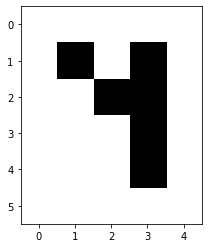

In [2]:
X = np.array([[1,1,1,1,1],
              [1,0,1,0,1],
              [1,1,0,0,1],
              [1,1,1,0,1],
              [1,1,1,0,1],
              [1,1,1,1,1],])
print(X.shape)
plt.imshow(X, cmap = 'gray')

In [3]:
X.flatten() #1차원:공간적 정보가 사라진다.

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1])

## 합성곱 층
---

### | 텐서플로우를 이용한 합성곱층 구현

```
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    padding='valid',
    strides=(1, 1),
    activation=None,
)

```

In [4]:
from tensorflow.keras.layers import Conv2D


#### **filters**

* filter 개수에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-01.PNG?raw=true
 width=450>
</p>


In [5]:
x = np.random.normal(0,1,size=(1,8,8,1)) # 인풋: (1, 8, 8,1)
print('인풋',x.shape)
for n in [1,3,5,8]:
 y = Conv2D(filters=n, kernel_size=1)(x) # 아웃풋: 
 print('filters:',n)
 print('아웃풋',y.shape)
 #filters : 채널의 개수를 정해준다!

인풋 (1, 8, 8, 1)
filters: 1
아웃풋 (1, 8, 8, 1)
filters: 3
아웃풋 (1, 8, 8, 3)
filters: 5
아웃풋 (1, 8, 8, 5)
filters: 8
아웃풋 (1, 8, 8, 8)


#### **kernel size**

* kernel size 에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-02.PNG?raw=true
 width=450>
</p>

In [6]:
#size2면 1,0,1,2
#size3면 1,0,1,1,2,0,1,0,1

#### **padding**

* padding 옵션에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.
  * valid
  * same

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-03.PNG?raw=true
 width=550>
</p>

In [7]:
print('인풋:',x.shape)
y_valid = Conv2D(filters=1,kernel_size=3,padding='valid')(x) #이미지크기 줄어듦
y_same = Conv2D(filters=1,kernel_size=3,padding='same')(x)
print('아웃풋 valid:',y_valid.shape) 
print('아웃풋 same:',y_same.shape)

# pedding : same 일 때 이미지의 크기가 변하지 않는다.

인풋: (1, 8, 8, 1)
아웃풋 valid: (1, 6, 6, 1)
아웃풋 same: (1, 8, 8, 1)


#### **strides**
* strides 의 크기에 따라 아웃풋의 shape가 어떻게 변화하는지 살펴봅니다.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-04.PNG?raw=true
 width=450>
</p>

In [8]:
#strides : 1,2,4 일 때 변화
for m in [1,2,4]:
 y = Conv2D(filters=1,kernel_size=3,padding='same', strides=m)(x)
 print(y.shape)

(1, 8, 8, 1)
(1, 4, 4, 1)
(1, 2, 2, 1)


## CNN 실습: MNIST 손글씨 이미지 분류
---

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

### **| CNN 모델을 이용한 분류**

####  **데이터 준비**

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


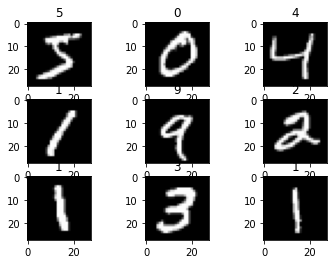

In [10]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.title(y_train[i])
  plt.imshow(x_train[i], cmap='gray')

In [11]:
#0~255 -> 0~1 정규화
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
#채널 추가
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### **모델 구성**
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-05_2.PNG?raw=true
 width=650>
</p>

In [13]:
from tensorflow.keras import layers, models


In [14]:
# 이 모델에서는 kernel_size =3, padding =same 으로
x = layers.Input(shape = (28,28,1))
y = layers.Conv2D(filters=8,
                   kernel_size=3, padding='same',
                   activation='relu')(x)
y = layers.Conv2D(filters=8,
                   kernel_size=3, padding='same',strides=2, 
                   activation='relu')(y)
y = layers.Conv2D(filters=3,
                   kernel_size=3, padding='same',strides=2, 
                   activation='relu')(y)
y = layers.Flatten()(y)                                                                        
y = layers.Dense(10, activation= 'softmax')(y)

model = models.Model(x, y)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 8)         584       
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 3)           219       
                                                                 
 flatten (Flatten)           (None, 147)               0         
                                                                 
 dense (Dense)               (None, 10)                1480      
                                                                 
Total params: 2,363
Trainable params: 2,363
Non-trainable par

In [53]:
x = layers.Input(shape = (28,28,1))
y = layers.Conv2D(filters=8,
                   kernel_size=3, padding='same',
                   activation='relu')(x)
y = layers.Conv2D(filters=8,
                   kernel_size=3, padding='same',strides=2, 
                   activation='relu')(y)
y = layers.Conv2D(filters=3,
                   kernel_size=3, padding='same',strides=2, 
                   activation='relu')(y)
y = layers.Flatten()(y)                                                                        
y = layers.Dense(10, activation= 'softmax')(y)

model_nottrain = models.Model(x, y)
model_nottrain.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 8)         584       
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 3)           219       
                                                                 
 flatten_1 (Flatten)         (None, 147)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1480      
                                                                 
Total params: 2,363
Trainable params: 2,363
Non-trainable p

#### **학습 및 평가**

In [15]:
# 최적화 : optimizer
# 오차구하기 : loss
model.compile(loss = 'sparse_categorical_crossentropy' ,
              optimizer ='adam',
              metrics = ['acc'] 
              )
model.fit(x_train,y_train, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4511 - acc: 0.8622
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2182 - acc: 0.9346
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1444 - acc: 0.9559
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1150 - acc: 0.9655
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0989 - acc: 0.9699
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0888 - acc: 0.9730
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0825 - acc: 0.9749
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0776 - acc: 0.9764
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0738 - acc: 0.9776
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0710 - acc: 0.9777


(10000, 10)
정답: 7
예측: [4.4494564e-10 1.0386654e-10 1.2030805e-08 8.7789267e-06 4.6022626e-13
 4.2855697e-09 1.4209113e-18 9.9998534e-01 6.5675664e-08 5.7552693e-06]


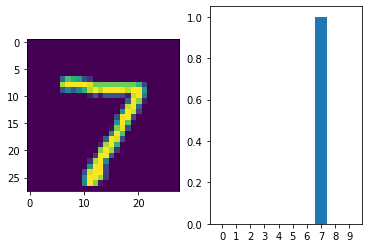

In [23]:
y_pred = model.predict(x_test)
print(y_pred.shape)
#0번째 샘플에 대해
print('정답:',y_test[0])
print('예측:',y_pred[0])
plt.subplot(121)
plt.imshow(x_test[0][:,:,0])
plt.subplot(122)
plt.bar(range(10), y_pred[0])
plt.xticks(range(10))
plt.show()

In [24]:
y_argmax = np.argmax(y_pred, axis=1)
print(y_argmax[0])

7


정답: 7
예측: 7


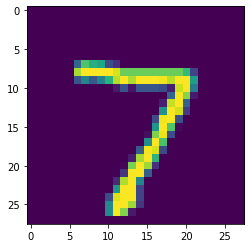

정답: 2
예측: 2


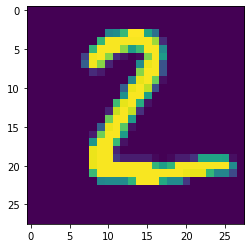

정답: 1
예측: 1


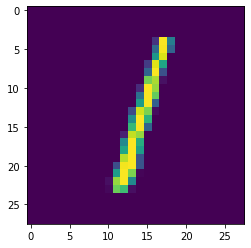

정답: 0
예측: 0


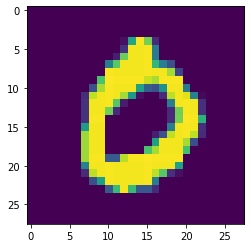

정답: 4
예측: 4


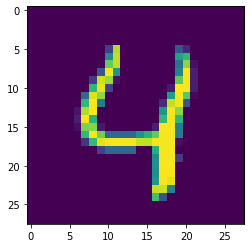

정답: 1
예측: 1


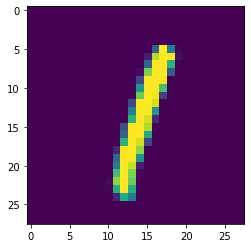

정답: 4
예측: 4


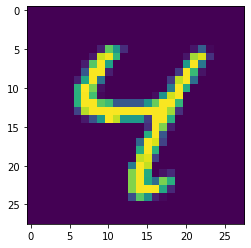

정답: 9
예측: 9


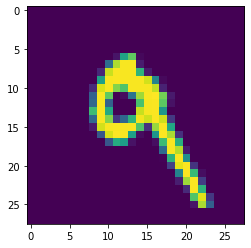

정답: 5
예측: 5


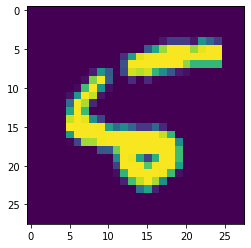

정답: 9
예측: 9


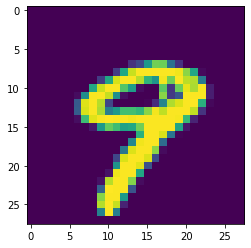

정답: 0
예측: 0


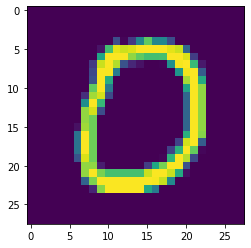

정답: 6
예측: 6


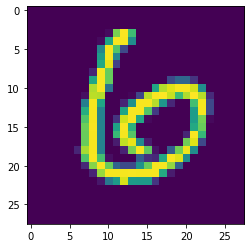

정답: 9
예측: 9


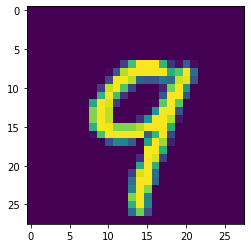

정답: 0
예측: 0


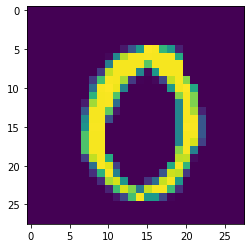

정답: 1
예측: 1


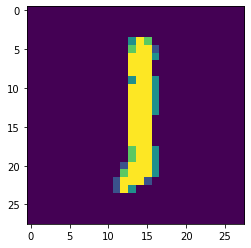

정답: 5
예측: 5


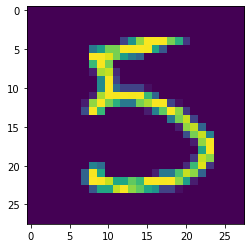

정답: 9
예측: 9


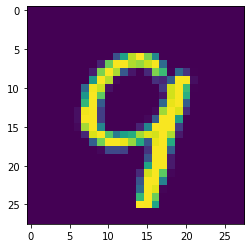

정답: 7
예측: 7


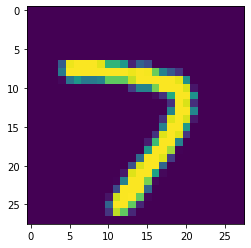

정답: 3
예측: 3


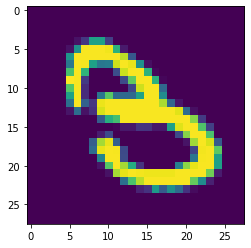

정답: 4
예측: 4


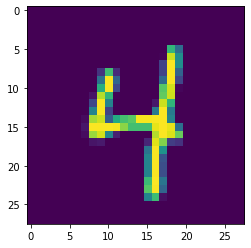

정답: 9
예측: 9


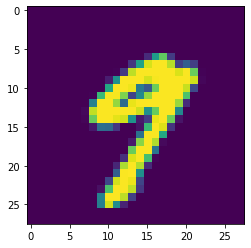

정답: 6
예측: 6


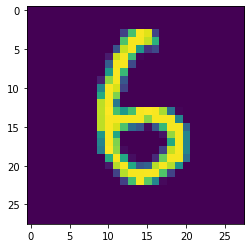

정답: 6
예측: 6


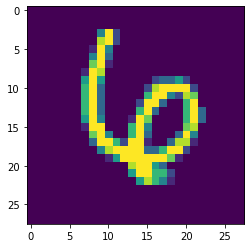

정답: 5
예측: 5


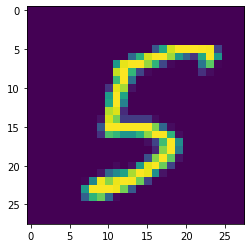

정답: 4
예측: 4


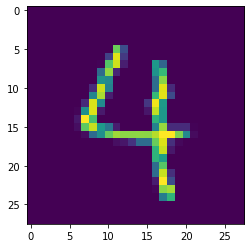

정답: 0
예측: 0


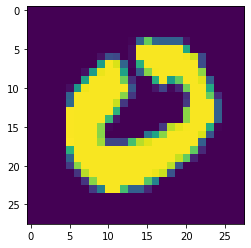

정답: 7
예측: 7


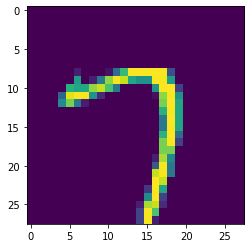

정답: 4
예측: 4


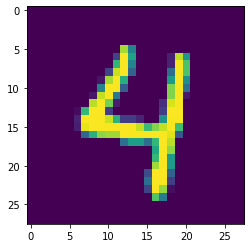

정답: 0
예측: 0


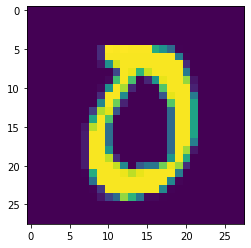

정답: 1
예측: 1


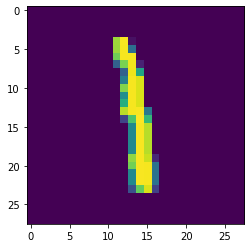

정답: 3
예측: 3


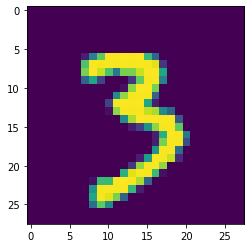

정답: 1
예측: 1


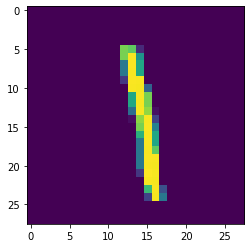

정답: 3
예측: 3


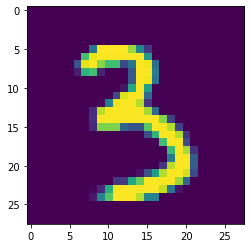

정답: 4
예측: 0


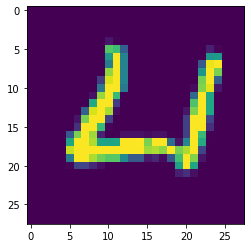

정답: 7
예측: 7


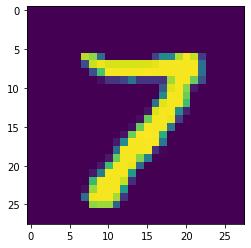

정답: 2
예측: 2


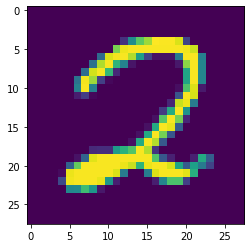

정답: 7
예측: 7


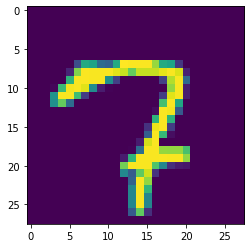

정답: 1
예측: 1


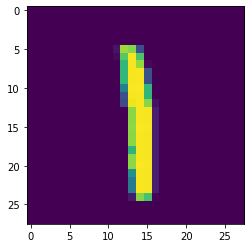

정답: 2
예측: 2


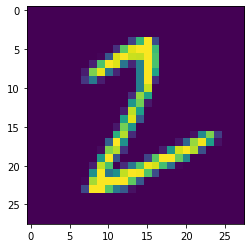

정답: 1
예측: 1


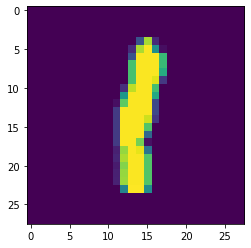

정답: 1
예측: 1


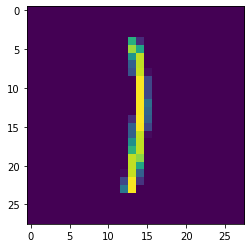

정답: 7
예측: 7


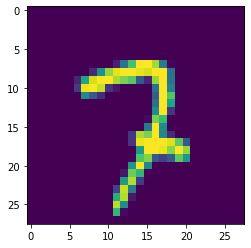

정답: 4
예측: 4


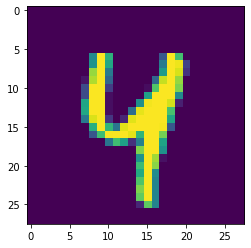

정답: 2
예측: 2


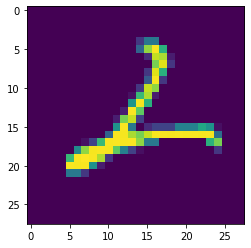

정답: 3
예측: 3


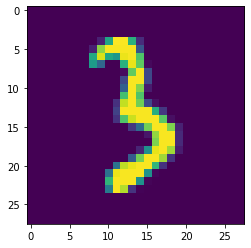

정답: 5
예측: 5


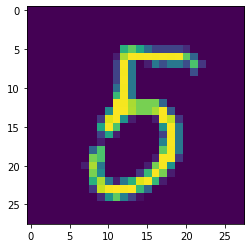

정답: 1
예측: 1


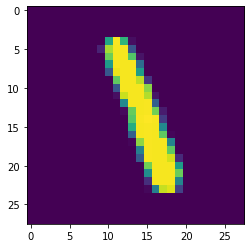

정답: 2
예측: 2


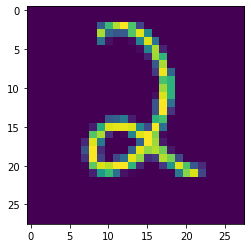

정답: 4
예측: 4


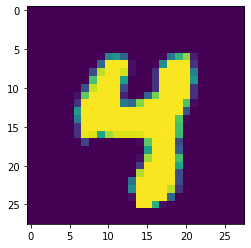

정답: 4
예측: 4


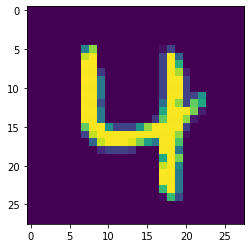

정답: 6
예측: 6


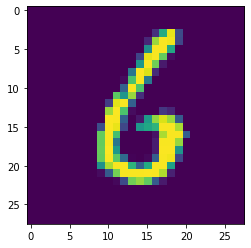

정답: 3
예측: 3


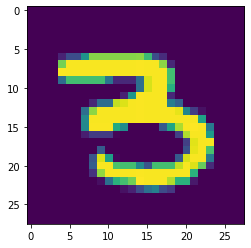

정답: 5
예측: 5


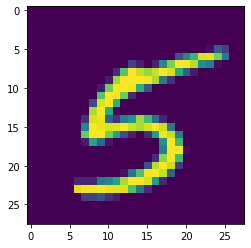

정답: 5
예측: 5


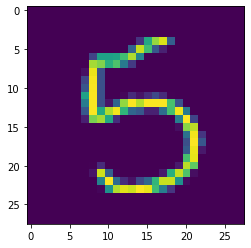

정답: 6
예측: 6


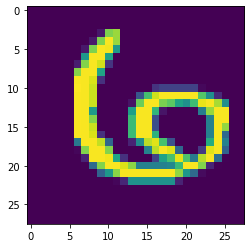

정답: 0
예측: 0


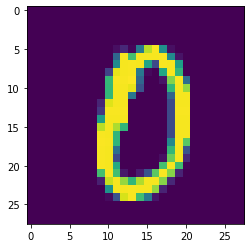

정답: 4
예측: 4


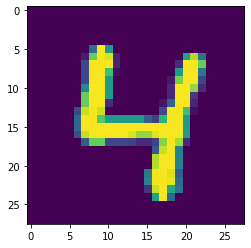

정답: 1
예측: 1


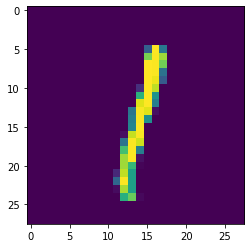

정답: 9
예측: 9


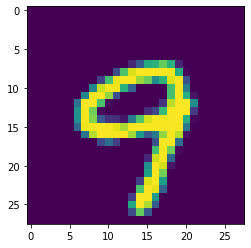

정답: 5
예측: 5


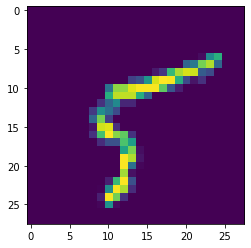

정답: 7
예측: 7


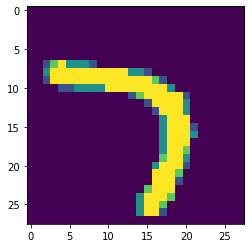

정답: 8
예측: 8


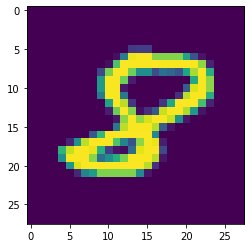

정답: 9
예측: 9


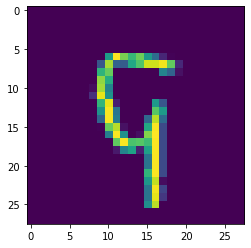

정답: 3
예측: 3


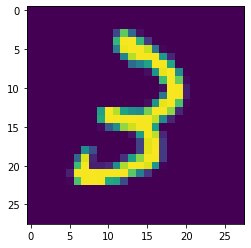

정답: 7
예측: 7


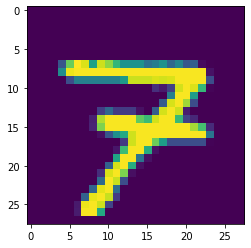

정답: 4
예측: 4


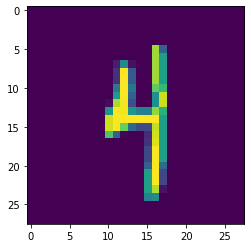

정답: 6
예측: 6


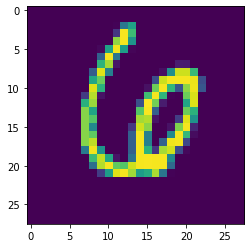

정답: 4
예측: 4


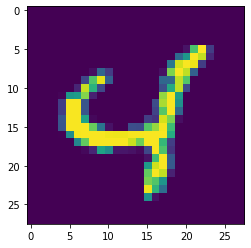

정답: 3
예측: 3


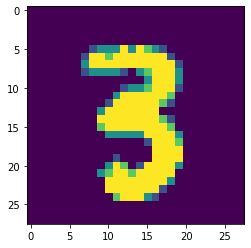

정답: 0
예측: 0


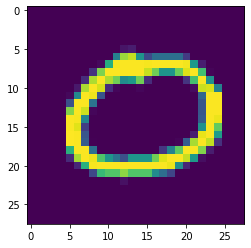

정답: 7
예측: 7


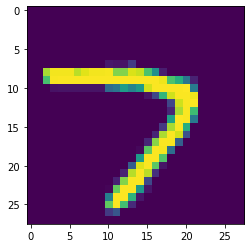

정답: 0
예측: 0


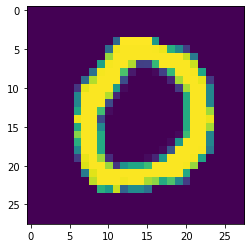

정답: 2
예측: 2


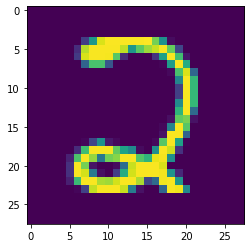

정답: 9
예측: 9


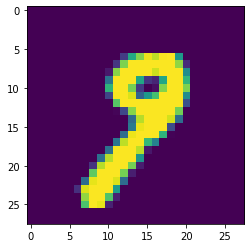

정답: 1
예측: 1


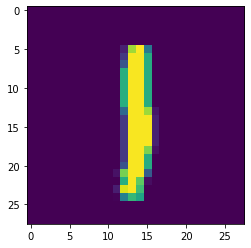

정답: 7
예측: 7


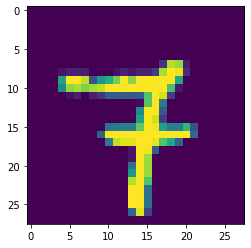

정답: 3
예측: 3


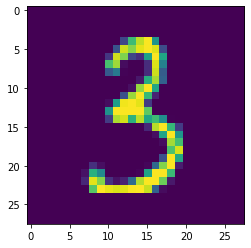

정답: 2
예측: 2


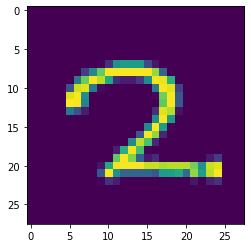

정답: 9
예측: 9


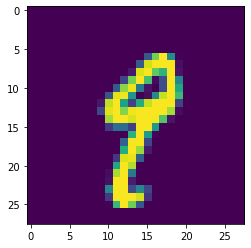

정답: 7
예측: 7


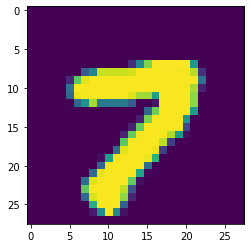

정답: 7
예측: 7


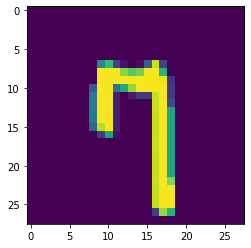

정답: 6
예측: 6


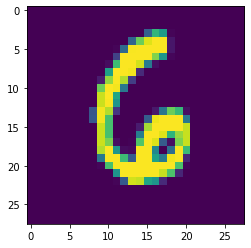

정답: 2
예측: 2


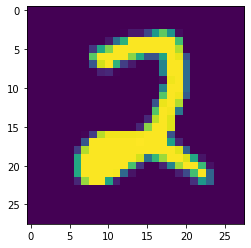

정답: 7
예측: 7


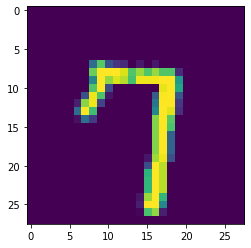

정답: 8
예측: 8


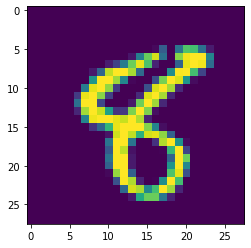

정답: 4
예측: 4


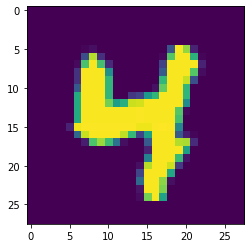

정답: 7
예측: 7


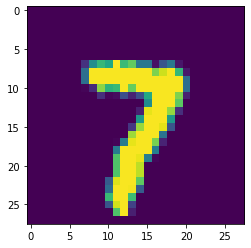

정답: 3
예측: 3


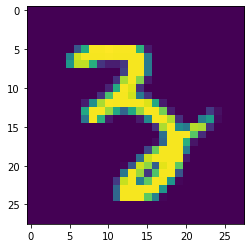

정답: 6
예측: 6


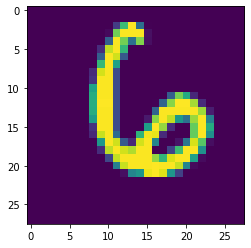

정답: 1
예측: 1


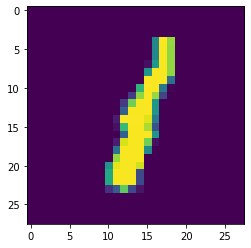

정답: 3
예측: 3


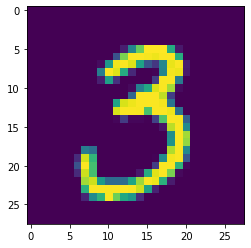

정답: 6
예측: 6


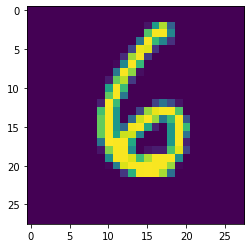

정답: 9
예측: 9


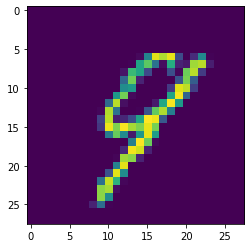

정답: 3
예측: 3


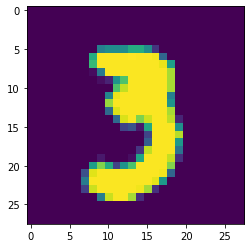

정답: 1
예측: 1


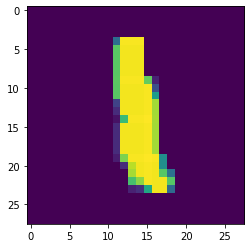

정답: 4
예측: 4


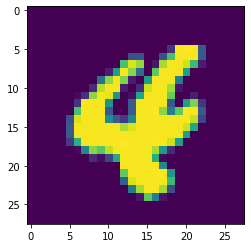

정답: 1
예측: 1


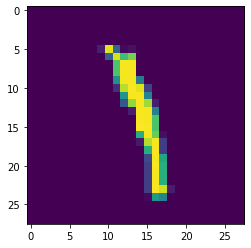

정답: 7
예측: 7


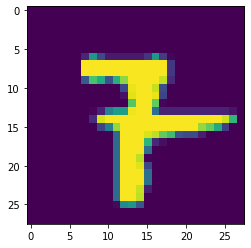

정답: 6
예측: 6


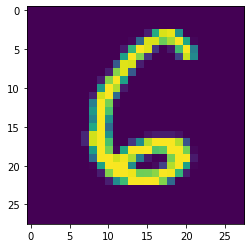

정답: 9
예측: 9


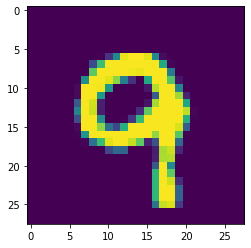

In [33]:
for idx in range(100):

 print('정답:',y_test[idx])
 print('예측:',y_argmax[idx])
 plt.imshow(x_test[idx][:,:,0])
 plt.show()

### **| Feature map**

#### **feature map 얻기**

In [38]:
layer_outputs = [layer.output for layer in model.layers]
model_outputs = models.Model(model.input, layer_outputs)
outputs = model_outputs(x_test)
for output in outputs:
  print(output.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 8)
(10000, 14, 14, 8)
(10000, 7, 7, 3)
(10000, 147)
(10000, 10)


In [54]:
layer_outputs = [layer.output for layer in model_nottrain.layers]
model_nottrain_outputs = models.Model(model_nottrain.input, layer_outputs)
nottrain_outputs = model_nottrain_outputs(x_test)
for output in nottrain_outputs:
  print(output.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 8)
(10000, 14, 14, 8)
(10000, 7, 7, 3)
(10000, 147)
(10000, 10)


In [55]:
cnn_idx = [1,2,3]
dnn_idx = [4,5]

#### **시각화**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0106-05_2.PNG?raw=true
 width=650>
</p>

[시각화 함수 스크립트](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/scripts/featuremap_dict.py)

1 번째 Convolutional 레이어 (28, 28, 8)


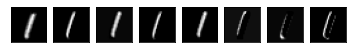

2 번째 Convolutional 레이어 (14, 14, 8)


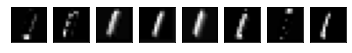

3 번째 Convolutional 레이어 (7, 7, 3)


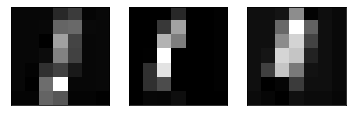

4 번째 Dense 레이어 (147,)


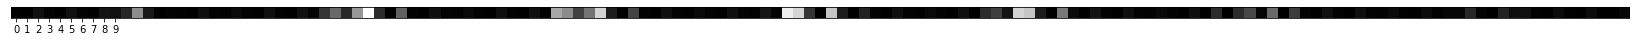

5 번째 Dense 레이어 (10,)


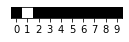

In [58]:
show_featuremap(5,outputs,cnn_idx,dnn_idx)

1 번째 Convolutional 레이어 (28, 28, 8)


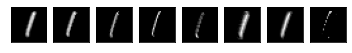

2 번째 Convolutional 레이어 (14, 14, 8)


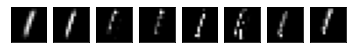

3 번째 Convolutional 레이어 (7, 7, 3)


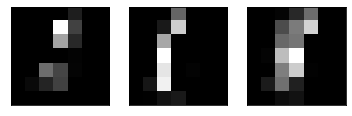

4 번째 Dense 레이어 (147,)


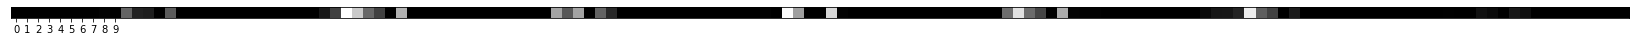

5 번째 Dense 레이어 (10,)


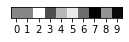

In [57]:
show_featuremap(5,nottrain_outputs,cnn_idx,dnn_idx)

In [40]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

def show_featuremap(sample_idx, fmaps, cnn_idxs, flatten_idxs):
  for idx in cnn_idxs:
    fmap = fmaps[idx][sample_idx]
    chs = fmap.shape[2]
    print(f'{idx} 번째 Convolutional 레이어 {fmap.shape}')
    for ch in range(chs):
      plt.subplot(1,chs,ch+1)
      plt.imshow(fmap[:,:,ch], cmap='gray')
      plt.xticks([]);plt.yticks([])
    plt.show()

  for idx in flatten_idxs:
    fmap = fmaps[idx][sample_idx]
    print(f'{idx} 번째 Dense 레이어 {fmap.shape}')
    plt.figure(figsize=(int(len(fmap)/5),10))
    plt.imshow(tf.reshape(fmap,(1,len(fmap))), cmap='gray')
    plt.xticks(range(10));plt.yticks([]);plt.show()